# Ejercicios

1. Observe sus comportamientos en la casa, en la universidad y en el medio de transporte que utiliza. Encuentre, para cada uno de estos escenarios sus reglas básicas

Para este caso se usara un diagrama de flujo para representar la toma de decisiones y la reglas que presenta la rutina de transporte de uno de los miembros del equipo.
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/Automatas_celulares.drawio.png)

2. Suponga una enfermedad, o un incendio forestal, o una moda, desarrolle un modelo de difusión usando ACs probabilísticos. O simule un robot con dos ruedas que evite obstáculos. Use LLMs.




Se aplicara un modelo de progagacion para una moda en una poblacion en la cual se tienen los siguientes 4 estados en relacion a la moda que se esta propagando.
 - Indiferente
 - Curioso
 - Convencido
 - Saturado

Teniendo en cuenta los estados anteriores, se tienen las siguientes reglas.
 - Indiferente a curioso: Si al menos N vecinos estan "Convencidos", se tiene una probailidad (p_exp) de volverse curioso.
 - Curioso a convencido: Se tiene una probabilidad (p_conv) de pasar a estado convencido.
 - Convencido a saturado: Luego de un tiempo en estado convencido se vulver saturado
 - Saturado a neutro: Se tiene una probabilidad (p_olv) de olvidar la moda y volver al estado neutro.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [ ]:
# Parámetros
grid_size = 30
steps = 15
# Probabilidades
p_exp = 0.5 #Probabilidad de estar expuesto
p_conv = 0.5 #Probabilidad para convencer
p_olv = 0.5 #Probabilidad para olvidar
# Condiciones
umbral_conv = 2
t_max = 5  # pasos antes de saturarse

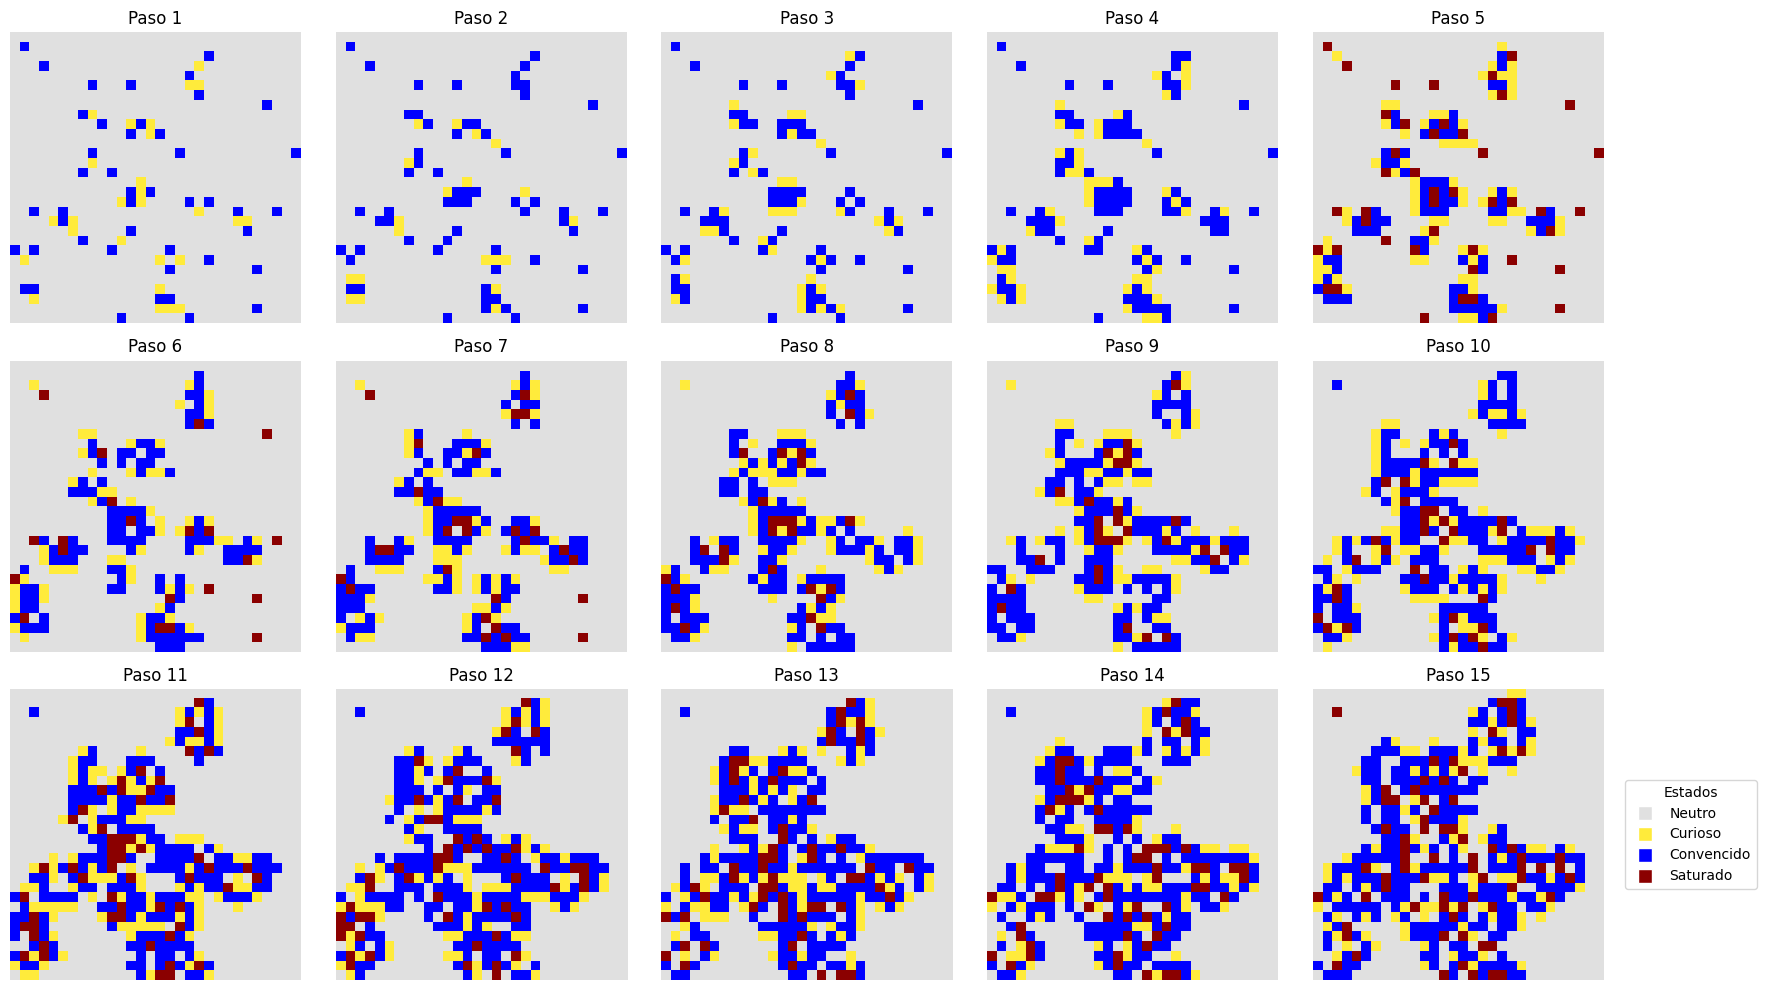

In [ ]:
# Inicialización de la cuadrícula
def inicializar():
    estado = np.zeros((grid_size, grid_size), dtype=int)
    tiempo_conv = np.zeros_like(estado)

    num_convencidos = int(0.05 * grid_size * grid_size)
    for _ in range(num_convencidos):
        x, y = np.random.randint(0, grid_size, 2)
        estado[x, y] = 2

    return estado, tiempo_conv

# Contar vecinos con un valor específico
def contar_vecinos_estado(estado, i, j, valor):
    vecinos = estado[max(i-1, 0):min(i+2, grid_size), max(j-1, 0):min(j+2, grid_size)]
    return np.sum(vecinos == valor) - (estado[i, j] == valor)

# Actualizar estados
def actualizar(estado, tiempo_conv):
    nuevo_estado = estado.copy()
    nuevo_tiempo = tiempo_conv.copy()

    for i in range(grid_size):
        for j in range(grid_size):
            est = estado[i, j]
            vecinos_conv = contar_vecinos_estado(estado, i, j, 2)

            if est == 0:  # Neutro
                if vecinos_conv >= umbral_conv and np.random.rand() < p_exp:
                    nuevo_estado[i, j] = 1

            elif est == 1:  # Curioso
                if np.random.rand() < p_conv:
                    nuevo_estado[i, j] = 2
                    nuevo_tiempo[i, j] = 0

            elif est == 2:  # Convencido
                nuevo_tiempo[i, j] += 1
                if nuevo_tiempo[i, j] >= t_max:
                    nuevo_estado[i, j] = 3

            elif est == 3:  # Saturado
                if np.random.rand() < p_olv:
                    nuevo_estado[i, j] = 0

    return nuevo_estado, nuevo_tiempo

# Inicialización
estado, tiempo_conv = inicializar()

# Configurar subplots: 3 filas y 5 columnas para 15 pasos
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
axes = axes.flatten()

# Colores y colormap
colors = ['#E0E0E0', '#FFEB3B', '#0000FF', '#8B0000']  # Neutro, Curioso, Convencido, Saturado
estado_labels = ['Neutro', 'Curioso', 'Convencido', 'Saturado']
cmap_discreto = ListedColormap(colors)

# Simulación y visualización
for i in range(min(steps, len(axes))):
    estado, tiempo_conv = actualizar(estado, tiempo_conv)
    ax = axes[i]
    ax.imshow(estado, cmap=cmap_discreto, vmin=0, vmax=3)
    ax.set_title(f"Paso {i+1}")
    ax.axis('off')

# Leyenda
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in colors]
plt.legend(handles, estado_labels, title="Estados", bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

3.Tome el plano de una ciudad pequeña y localice, por ejemplo, las droguerías, o colegios ¿es posible que falte alguno en la ciudad? Incluya información adicional como densidad de personas. Utilice diagramas de Voronoi.

Para realizar este ejercicio se usaron los centros comerciales de Bogota como objetos de referencia. La cual a fecha de 2023 posee una poblacion de 7,9 millones de habitantes aproximadamente, distribuidos en una superficie de 1776 km^2 para una densidad de poblacion aproximada de 5091 habitantes/km^2.

Imagen de los centros comerciales marcados en el mapa.\
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/cc_bogota.png)\


Imagen del diagrama Voronoi de los centros comerciales de Bogota.\
![Rutina de transporte](https://raw.githubusercontent.com/Jbarreraro/Inteligencia_artificial_y_mini_robots/refs/heads/main/Automatas_celulares/Images/cc_voronoi.png)\